# Predictive Analytics : People Personal Types  


![Types Of Personality](https://i.pinimg.com/736x/0b/17/f4/0b17f428ef7d798e5c8b4e7f4c547237.jpg)

## Business Understanding

### Problem Statements
Rumusan masalah berdasarkan latar belakang adalah:

- Fitur aktivitas sosial media mana yang paling berpengaruh terhadap produktivitas?
- Model machine learning apa yang paling efektif untuk memprediksi produktivitas berdasarkan aktivitas sosial media?

### Goals
tujuan untuk menyelesaikan permasalahan diatas adalah:

- Mengidentifikasi fitur yang paling berkorelasi dengan produktivitas berdasarkan aktivitas sosial media
- Membangun model machine learning yang dapat memprediksi produktivitas secara akurat berdasarkan fitur-fitur yang ada

### Solution statements

- Melakukan exploratory data analysis dan teknik visualisasi data untuk memahami distribusi, karakteristik data, serta mengidentifikasi korelasi antar fitur dan hubungan dengan variabel target produktivitas.
- Mengimplementasikan berbagai algoritma machine learning untuk mendapatkan model dengan performa optimal.
Melakukan evaluasi komprehensif untuk membandingkan performa berbagai model dan memilih model terbaik berdasarkan validasi pada data testing.

### Metodelogi

Prediksi tingkat produktivitas seseorang berdasarkan aktivitas sosial media adalah tujuan yang ingin dicapai dalam proyek ini. Seperti yang kita ketahui, produktivitas merupakan variabel kontinu. Dalam predictive analytics, ketika membuat prediksi terhadap variabel kontinu, artinya Anda sedang menyelesaikan permasalahan regresi. Oleh karena itu, metodologi pada proyek ini adalah membangun model regresi dengan skor produktivitas aktual sebagai target.

### Metric

Untuk mengevaluasi kinerja model regresi dalam memprediksi skor produktivitas berdasarkan aktivitas sosial media, digunakan beberapa metrik utama yaitu Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared (R²). MAE mengukur rata-rata selisih absolut antara nilai prediksi dan nilai aktual, sedangkan MSE dan RMSE memberikan penalti lebih besar pada error yang besar, dengan RMSE mudah diinterpretasikan karena satuannya sama dengan target. Sementara itu, R-squared menunjukkan seberapa baik model dapat menjelaskan variasi pada data produktivitas, sehingga semakin tinggi nilai R², semakin baik model dalam melakukan prediksi.

## Data Understanding

Tahapan untuk memahami dataset secara mendalam

### Data Loading

tahapan untuk memuat dataset yang akan digunakan.

<br>


**Datasets Information**


| Jenis | Keterangan |
| ------ | ------ |
| Title | Predict People Personality Types |
| Source | [Kaggle](https://www.kaggle.com/datasets/stealthtechnologies/predict-people-personality-types) |
| Owner | [Umair Zia](https://www.kaggle.com/stealthtechnologies) |
| License | MIT |
| Tags | Education, Demographics, Social Science, Beginner
| Usability | 10.00 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install gdown

!gdown --folder https://drive.google.com/drive/folders/1Xm6bS7ofcXTQa2iJcXE4q7Nj70AytI1I?usp=sharing

Retrieving folder contents
Processing file 1StggmG7DU_bsbAj0oeniFsZBZlmREbbm personalilty_classification.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1StggmG7DU_bsbAj0oeniFsZBZlmREbbm
To: /content/submission/personalilty_classification.csv
100% 3.38M/3.38M [00:00<00:00, 57.1MB/s]
Download completed


In [3]:
path = '/content/submission/personalilty_classification.csv'

In [4]:
df = pd.read_csv(path)
df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP
...,...,...,...,...,...,...,...,...,...
43739,26.0,Male,1,8.88656,5.118399,8.48784,5.331942,Arts,ENTP
43740,29.0,Male,0,2.71470,6.851956,0.25519,3.623678,Unknown,ISFP
43741,25.0,Female,0,2.00982,6.544036,6.63911,6.201555,Technology,ISTJ
43742,23.0,Male,0,7.23553,4.876780,2.41671,4.654016,Arts,ENFP


dari output diatas kita dapat tahu bahwa terdapat 43744 baris dan 9 kolom pada dataset

### Exploratory Data Analysis

#### Deskripsi Variabel

- Age: Usia
- Gender: Jenis kelamin
- Education: Tingkat pendidikan
    - Education = 1 → Minimal lulusan sarjana (graduate-level atau lebih tinggi)
    - Education = 0 → Lulusan di bawah sarjana (undergraduate, SMA, atau tidak berpendidikan)
- Introversion Score: Skor kecenderungan introvert
- Sensing Score	Skor: kecenderungan sensing
- Thinking Score: Skor kecenderungan berpikir
- Judging Score: Skor kecenderungan menilai
- Interest: Minat pribadi (misalnya: Arts, Sports, Others)
- Personality: Tipe kepribadian MBTI

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  float64
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ MB


Dari output diatas dapat diketahui bahwa terdapat:

- 1 kolom integer
- 3 kolom object
- 5 kolom float

In [6]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,43744.000000,43744.000000,43744.000000,43744.000000,43744.000000,43744.000000
mean,27.437203,0.229014,4.588349,5.780074,5.419131,5.391041
std,4.893805,0.420203,2.902628,1.241648,2.900785,1.442413
min,18.000000,0.000000,0.000150,0.000000,0.000320,0.000000
25%,24.000000,0.000000,2.067020,4.953340,2.895750,4.511842
50%,27.000000,0.000000,4.261680,6.162928,5.769870,5.771635
75%,30.000000,0.000000,7.085002,6.622978,7.923503,6.409583
max,52.000000,1.000000,9.999920,9.803837,9.999770,10.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

In [7]:
df.shape

(43744, 9)

Dari Output diatas didapat informasi:
<br>

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 43744 | 9 |


<br>

#### Menangani Duplikat, Missing Value dan Outliers

In [8]:
df_clean = df.copy()

In [9]:
df_clean['Age'] = df_clean['Age'].astype(int)

In [10]:
duplicated = df_clean.duplicated().sum()
print(f"jumlah data duplikat : {duplicated}")

jumlah data duplikat : 1028


dari output diatas dapat diketahui terdapat 1028 duplikat pada dataset

In [11]:
df_clean.drop_duplicates(inplace=True)

code ini berfungsi untuk menghapus duplikat

In [12]:
df_clean.isna().sum()

,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


In [13]:
missing_value = df_clean.isna().sum()
print(missing_value)
print(f"Total remaining missing values: {missing_value.sum()}")

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64
Total remaining missing values: 0


dari output ini tidak terdapat missing value

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42716 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 42716 non-null  int64  
 1   Gender              42716 non-null  object 
 2   Education           42716 non-null  int64  
 3   Introversion Score  42716 non-null  float64
 4   Sensing Score       42716 non-null  float64
 5   Thinking Score      42716 non-null  float64
 6   Judging Score       42716 non-null  float64
 7   Interest            42716 non-null  object 
 8   Personality         42716 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 3.3+ MB


In [15]:
df_clean.head(5)

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


**Menangani Outlier**

In [16]:
outliers=['Age','Introversion Score','Sensing Score','Thinking Score','Judging Score']

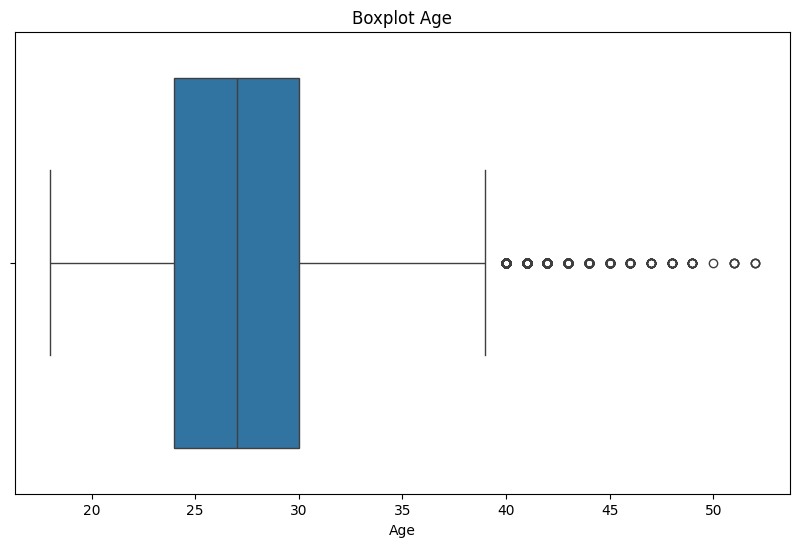

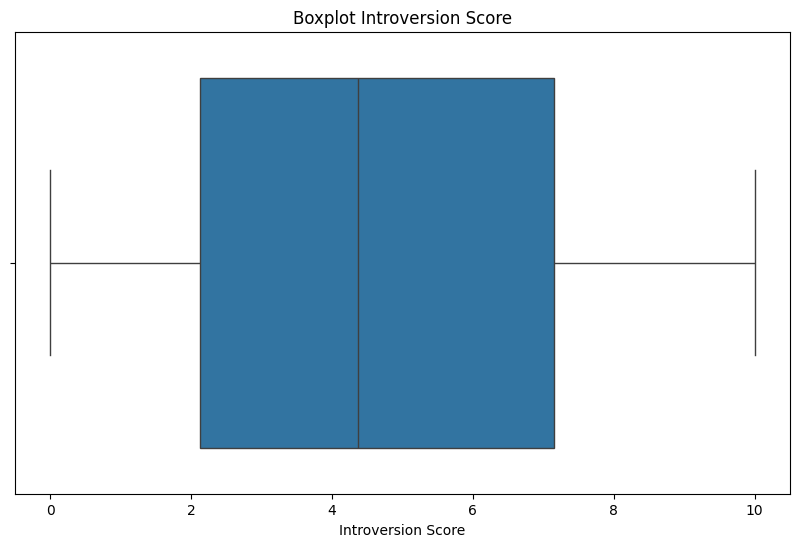

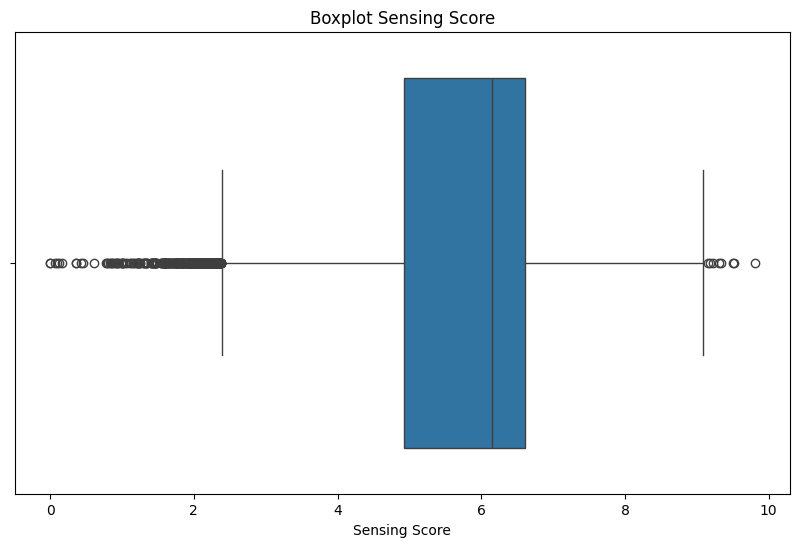

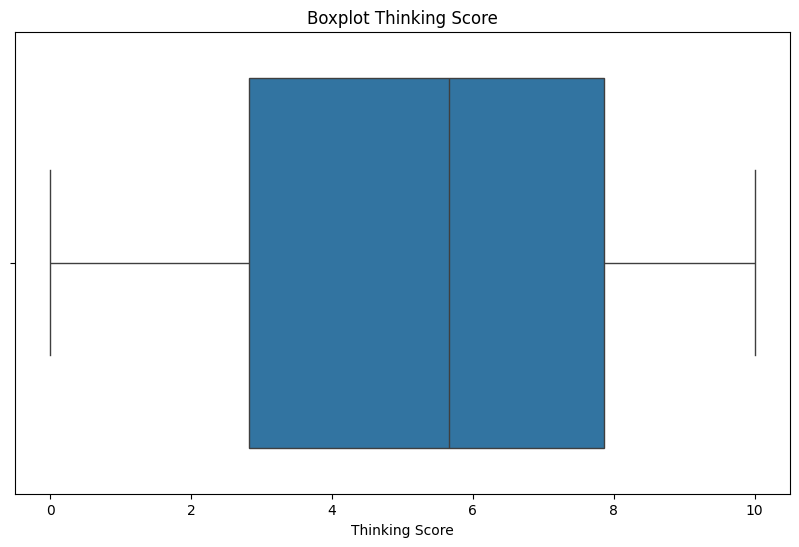

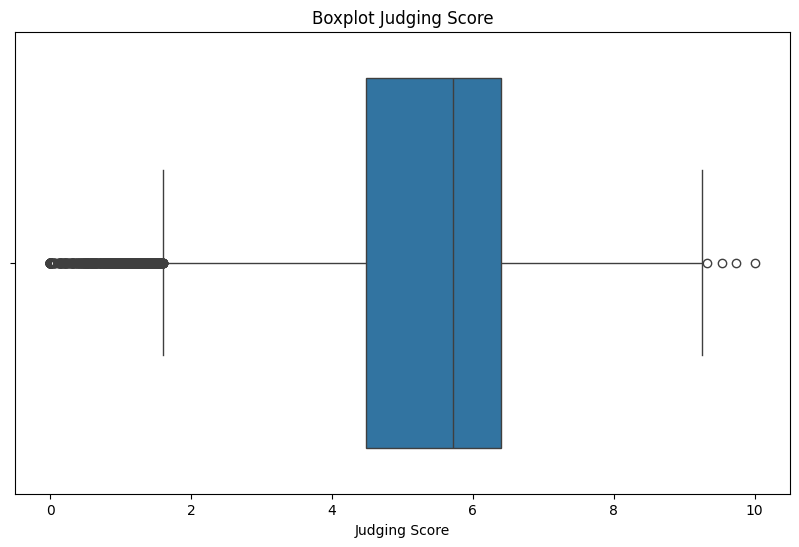

In [17]:
for num in outliers:
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df_clean, x=num)
  plt.title(f'Boxplot {num}')
  plt.show()

dari boxplot dapat diketahui terdapat beberapa kolom dengan outlier, penggunaan teknik menganti nilai luar dengan batas atas dan bawah dapat digunakan untuk mengganti nilai outlier menjadi nilai batas atas dan batas bawah data

In [18]:
# Fungsi untuk menangani outlier
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti nilai di luar batas dengan batas atas atau bawah
    data[column] = data[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

# Iterasi untuk semua kolom
for col in outliers:
    if col in df_clean.columns:
        handle_outliers(df_clean, col)

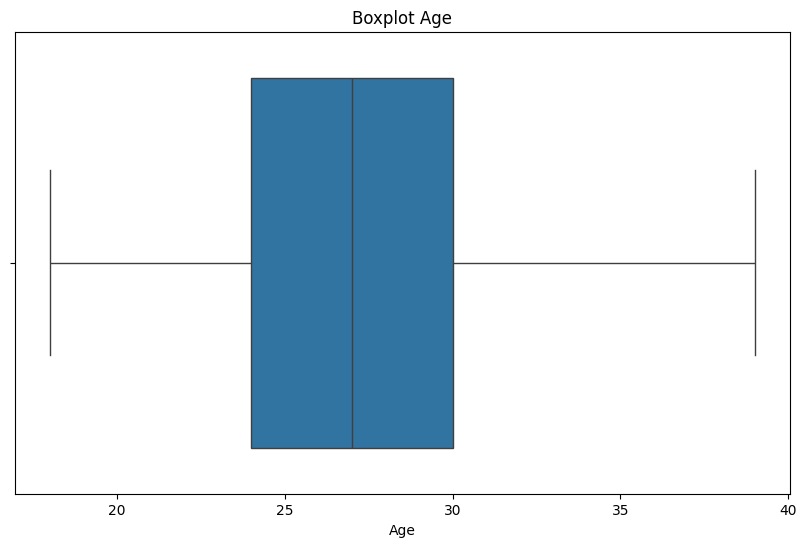

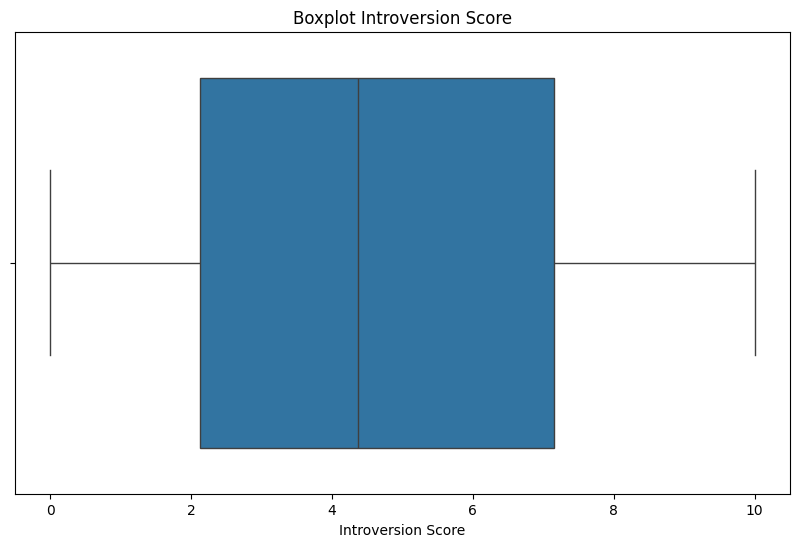

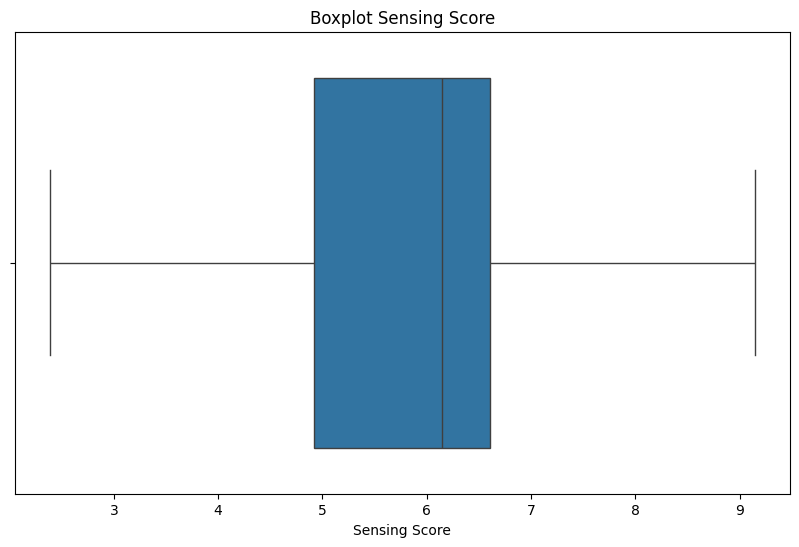

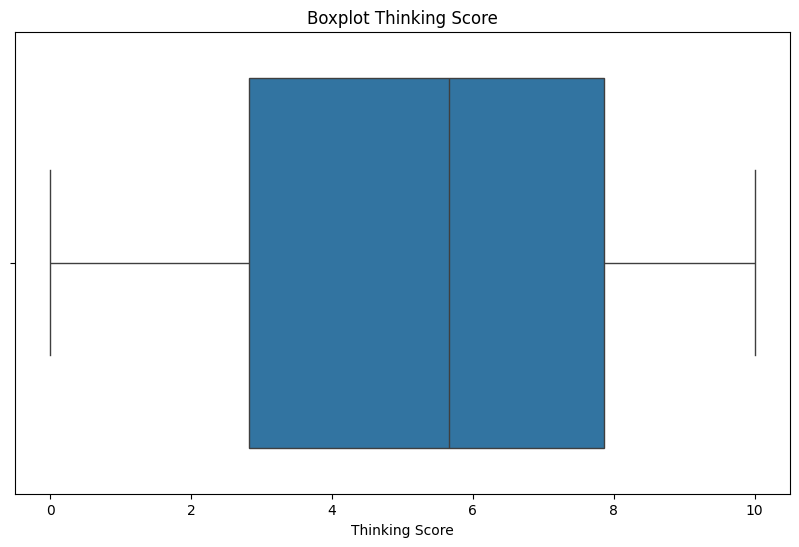

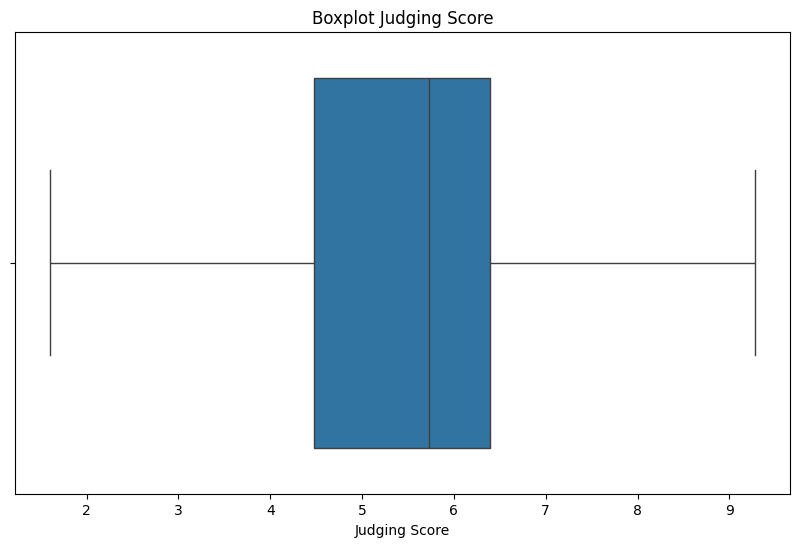

In [19]:
for num in outliers:
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df_clean, x=num)
  plt.title(f'Boxplot {num}')
  plt.show()

In [20]:
df_clean.shape

(42716, 9)

dari output code diatas dapat diketahui terdapat 9 kolom dan 42716 baris setelah melakukan proses Menangani Duplikat, Missing Value dan Outliers

### Exploratory Data Analysis - Univariate Analysis

In [21]:
numerical_columns = df_clean.select_dtypes(include='number').columns.to_list()
categorical_columns = df_clean.select_dtypes(include='object').columns.to_list()

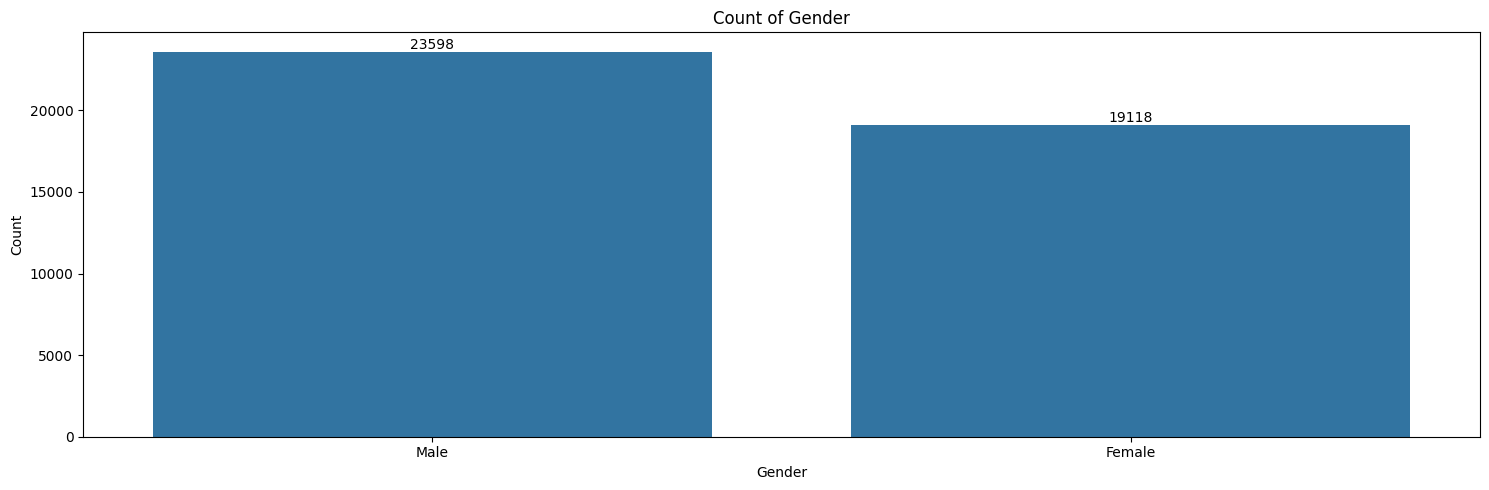

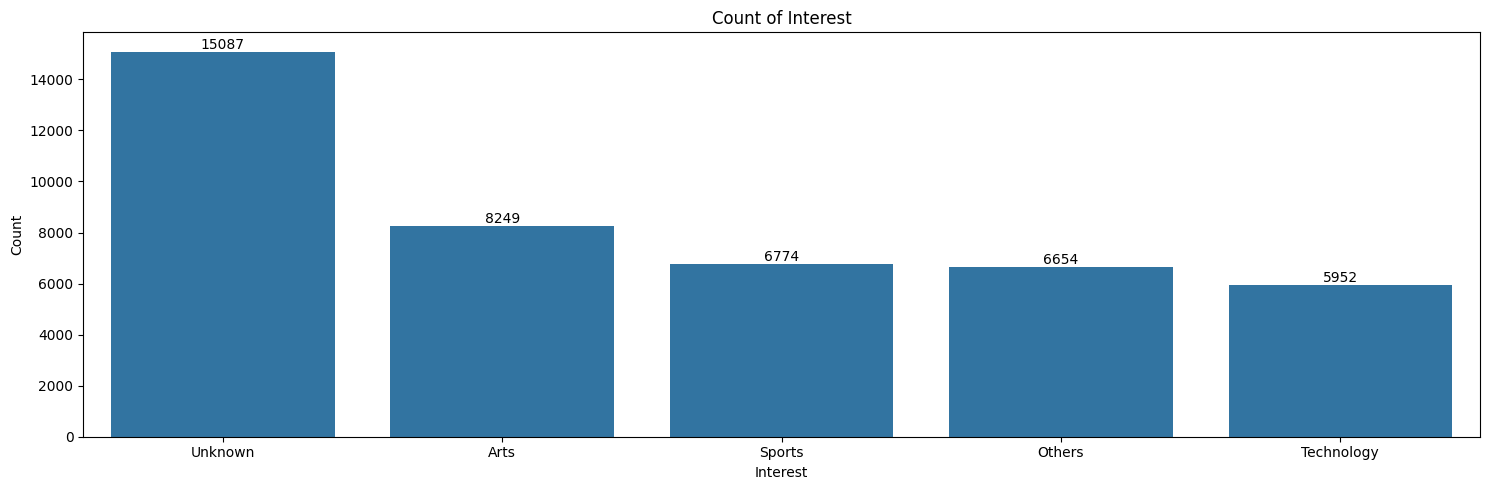

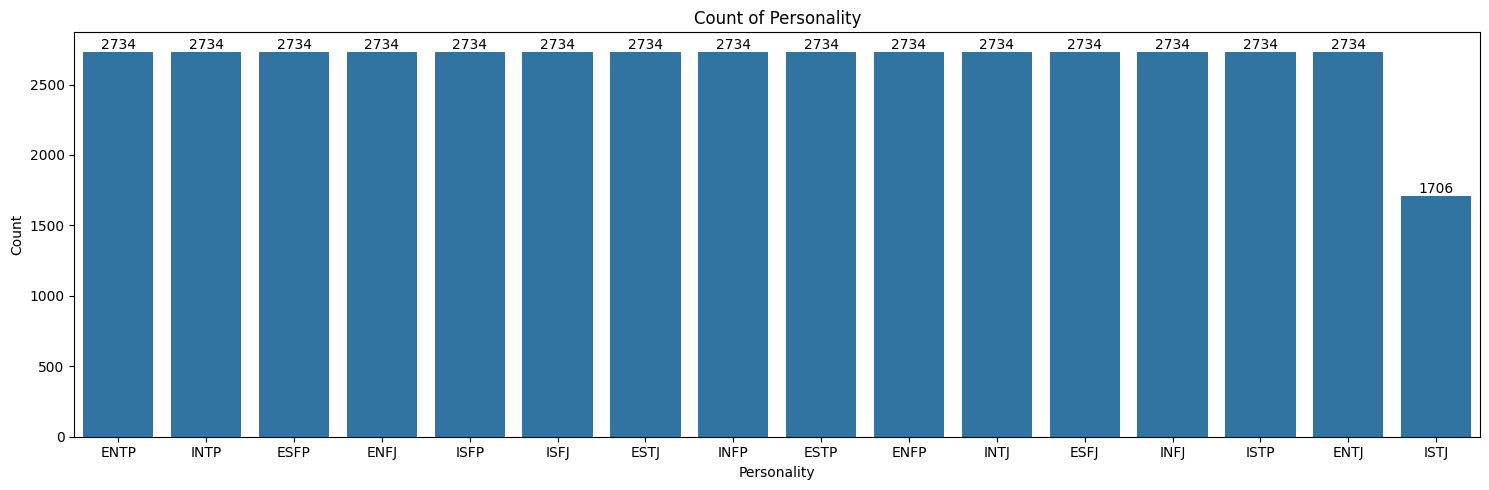

In [22]:
for feature in categorical_columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=feature, data=df_clean, order=df_clean[feature].value_counts().index)

    for container in plt.gca().containers:
      plt.gca().bar_label(container)

    plt.title('Count of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

**Analisis Kolom Categorical**


**Numerical Features**

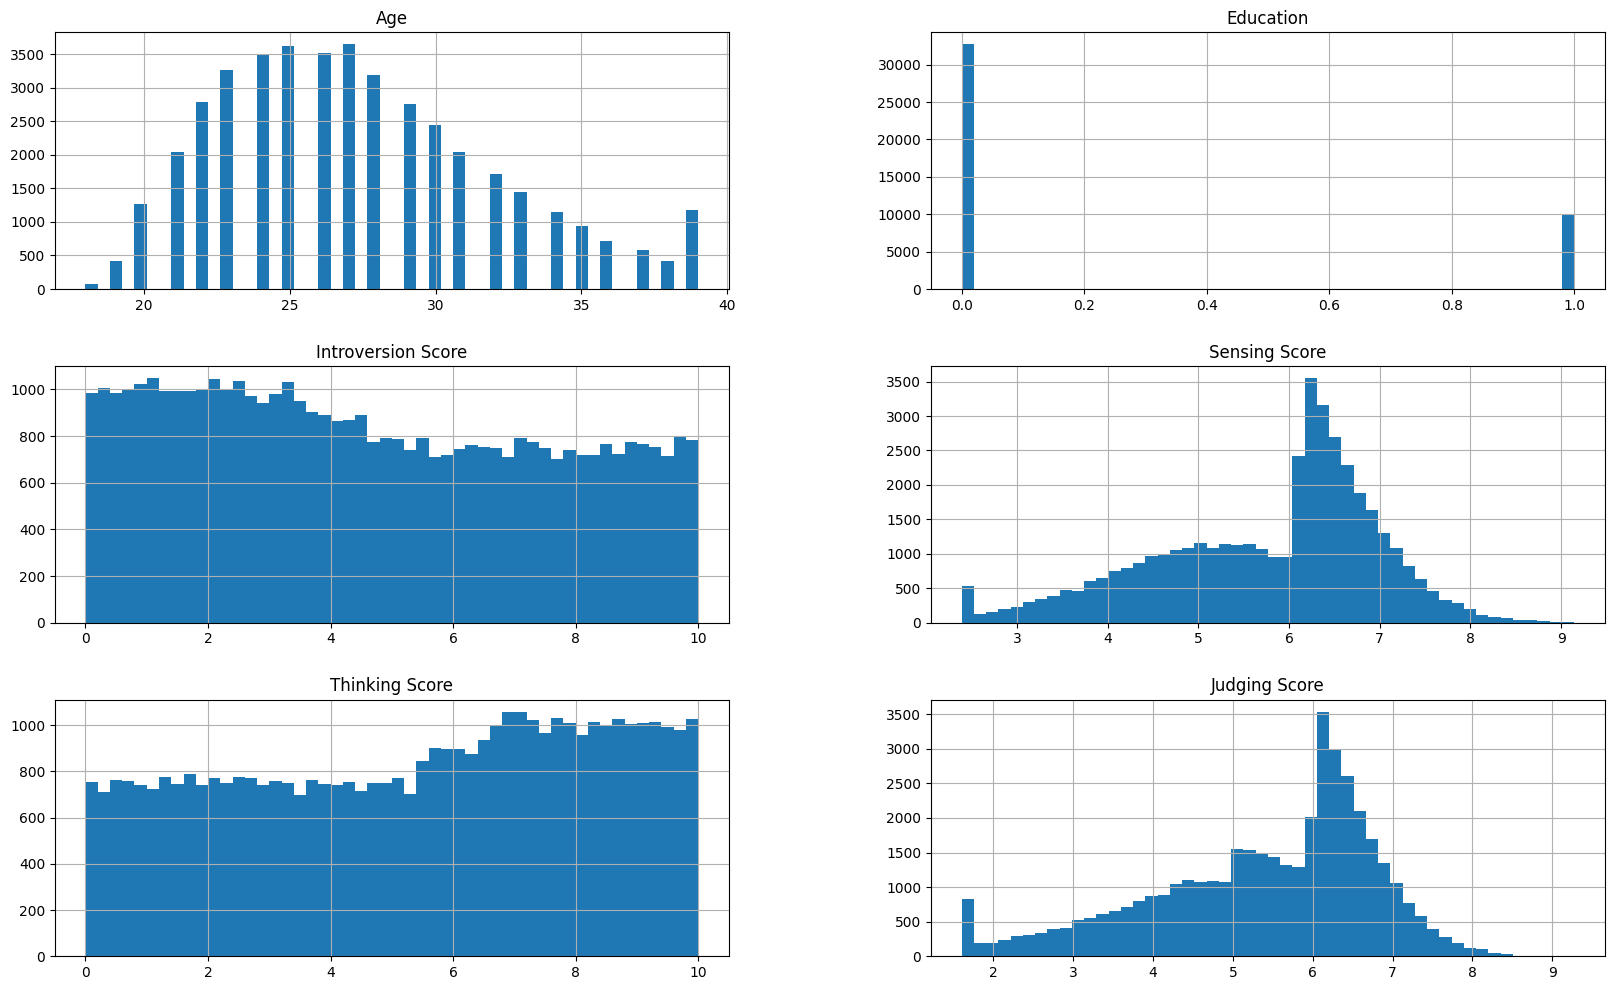

In [23]:
df_clean.hist(bins=50, figsize=(20,12))
plt.show()

### Exploratory Data Analysis - Multivariate Analysis

Categorical Features

In [24]:
num_cols = df_clean.select_dtypes(include='number').columns.tolist()
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()

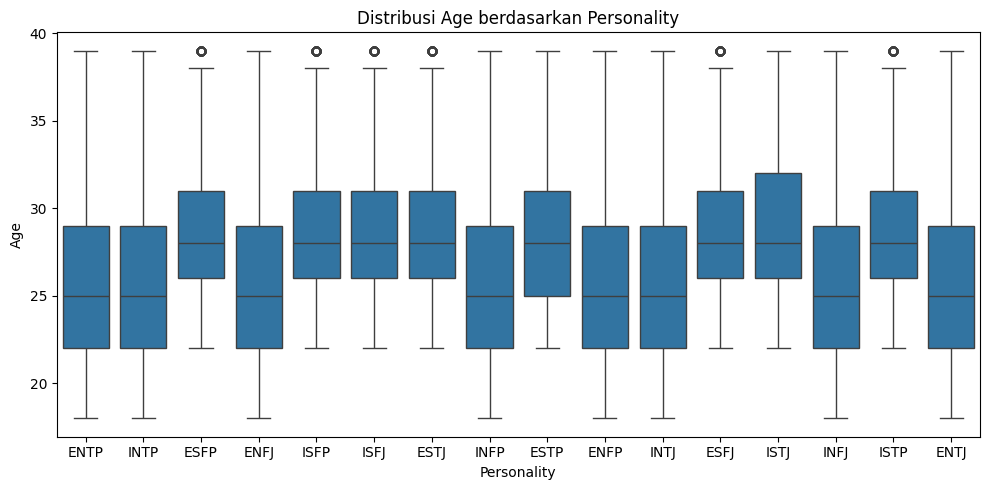

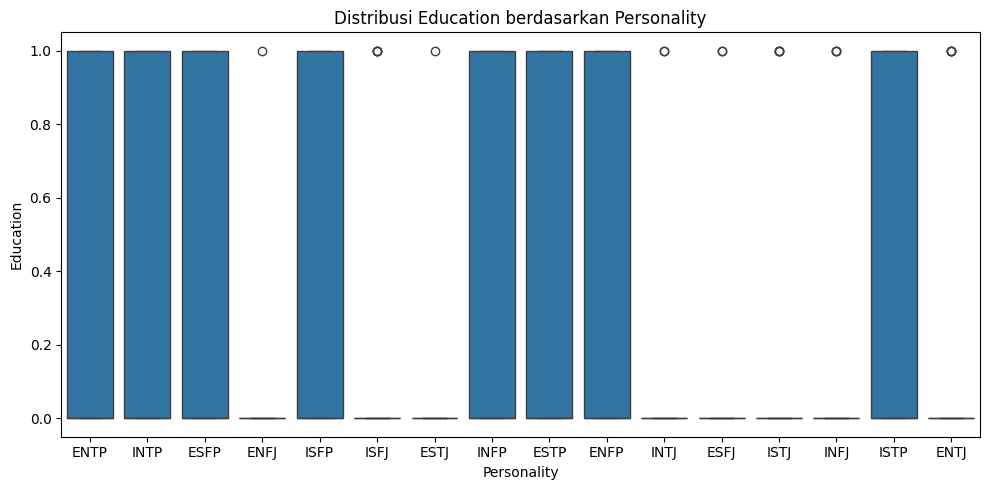

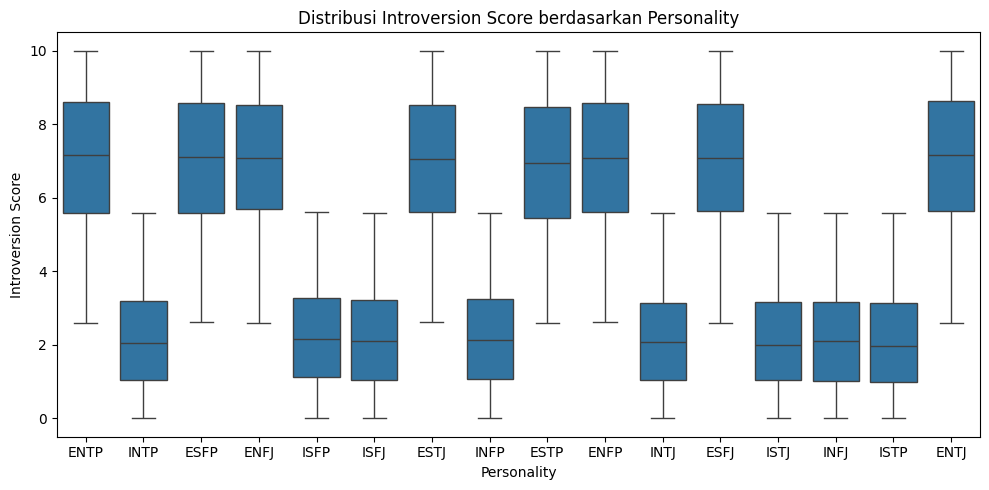

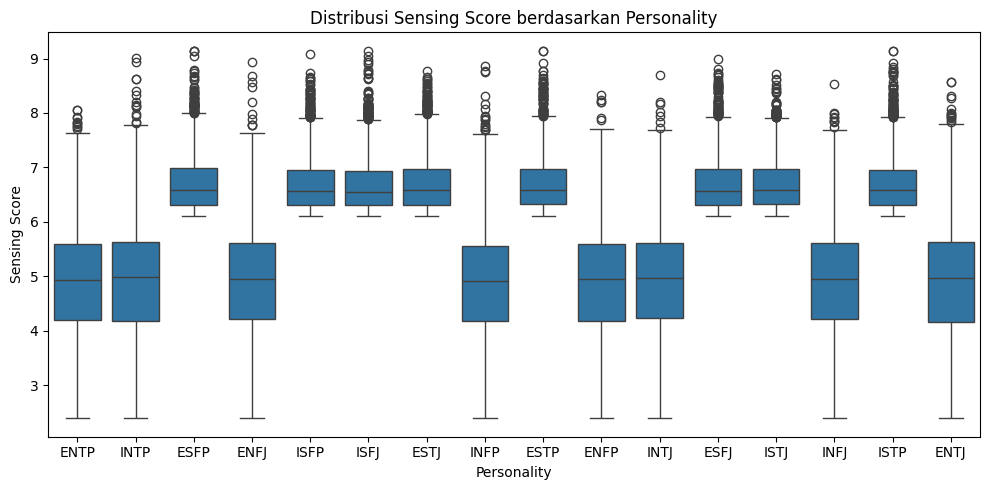

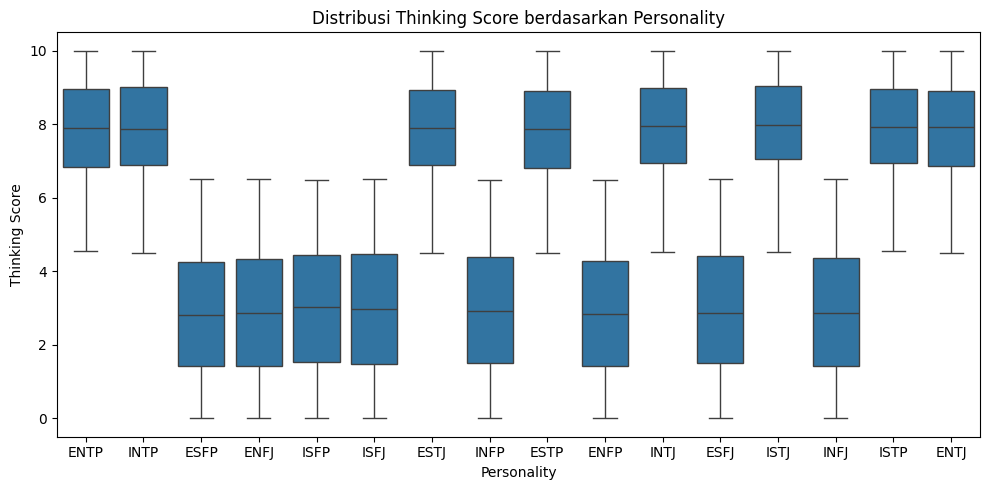

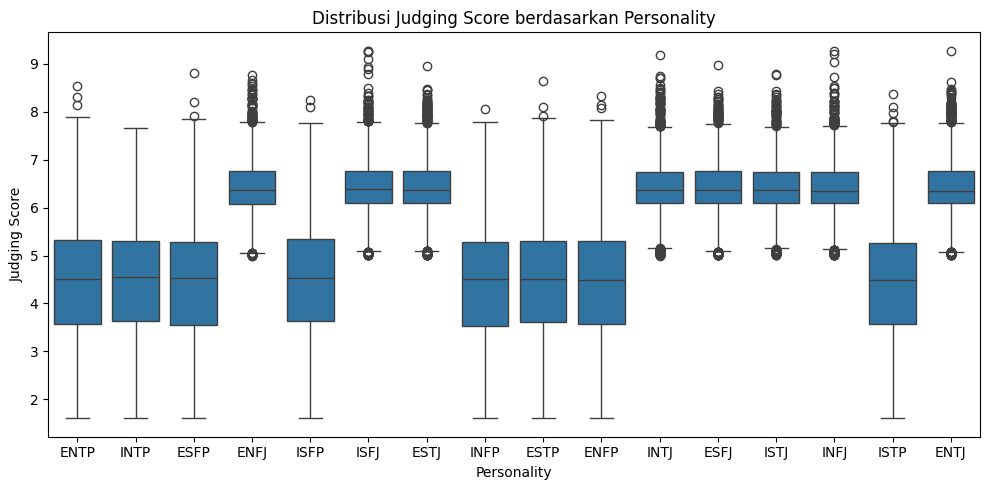

In [25]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Personality', y=col, data=df_clean)
    plt.title(f'Distribusi {col} berdasarkan Personality')
    plt.tight_layout()
    plt.show()

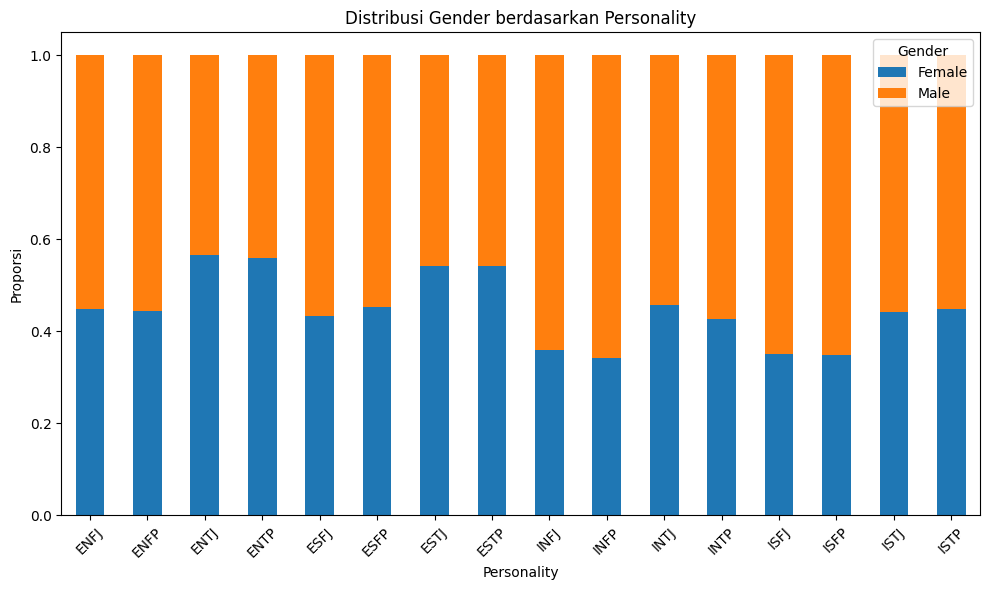

In [26]:
crosstab_gender = pd.crosstab(df['Personality'], df['Gender'], normalize='index')

# Plot
crosstab_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Gender berdasarkan Personality')
plt.ylabel('Proporsi')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

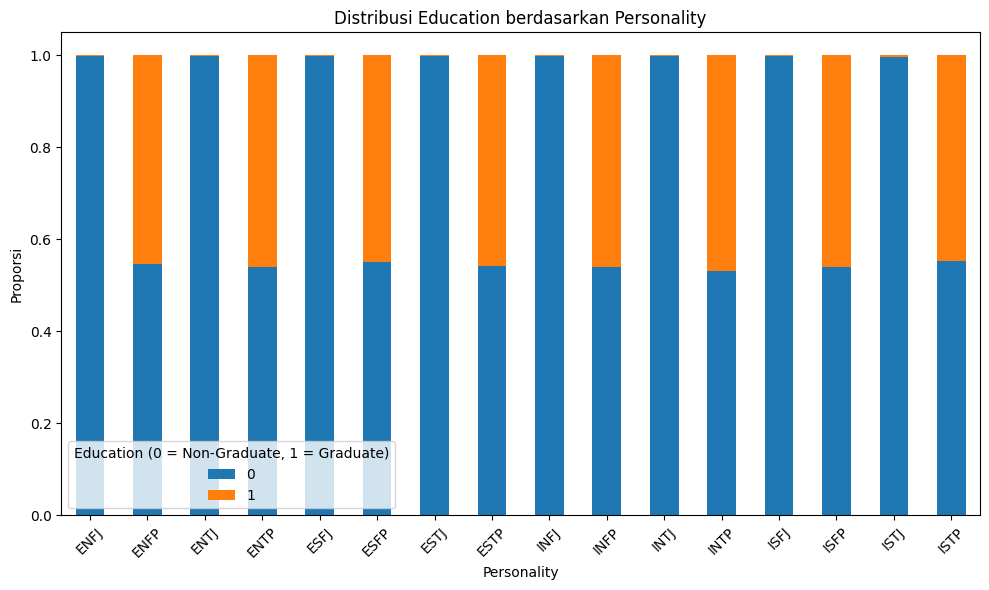

In [27]:
crosstab_edu = pd.crosstab(df['Personality'], df['Education'], normalize='index')

# Plot
crosstab_edu.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribusi Education berdasarkan Personality')
plt.ylabel('Proporsi')
plt.xticks(rotation=45)
plt.legend(title='Education (0 = Non-Graduate, 1 = Graduate)')
plt.tight_layout()
plt.show()

**Numerical Feature**

Untuk mengamati hubungan antara fitur numerik, Kita akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

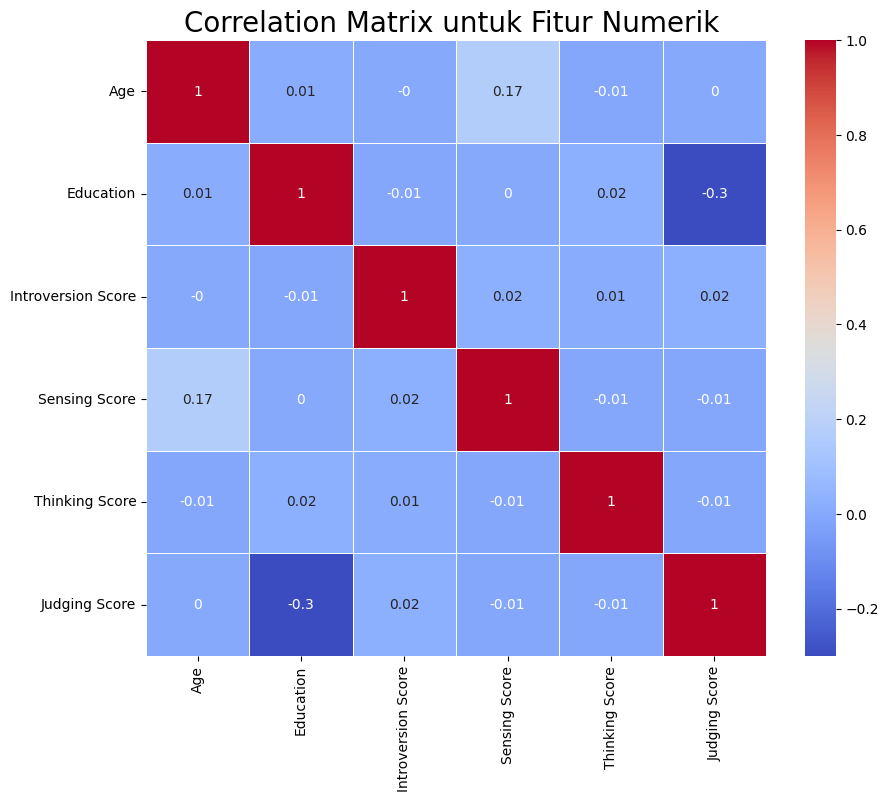

In [28]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numerical_columns].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Data Preparation

In [29]:
df_final = df_clean.copy()

### Encoding Fitur Kategori

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_final['Gender'] = label_encoder.fit_transform(df_final['Gender'])

df_final.head(5)

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,0,1,5.89208,2.388200,7.32363,5.462224,Arts,ENTP
1,24.0,0,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,0,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,1,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,0,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


Fitur Gender diencoding dengan label encoder

In [31]:
from sklearn.preprocessing import OneHotEncoder
df_final = pd.concat([df_final, pd.get_dummies(df_final['Personality'], prefix='Personality')],axis=1)
df_final = pd.concat([df_final, pd.get_dummies(df_final['Interest'])],axis=1)
df_final.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,Personality_ENFJ,...,Personality_INTP,Personality_ISFJ,Personality_ISFP,Personality_ISTJ,Personality_ISTP,Arts,Others,Sports,Technology,Unknown
0,21.0,0,1,5.89208,2.388200,7.32363,5.462224,Arts,ENTP,False,...,False,False,False,False,False,True,False,False,False,False
1,24.0,0,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP,False,...,True,False,False,False,False,False,False,False,False,True
2,26.0,0,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP,False,...,False,False,False,False,False,False,True,False,False,False
3,30.0,1,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ,True,...,False,False,False,False,False,False,False,True,False,False
4,31.0,0,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP,False,...,False,False,True,False,False,False,True,False,False,False


Fitur Personality dan Interest diencode dengan One Hot Encoder

### Train-Test-Split

In [33]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['Personality','Interest'], axis=1)
y = df_final['Personality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

- test_size=0.2 artinya 20% data untuk test, 80% untuk train (bisa diubah sesuai kebutuhan).
- random_state agar pembagian data konsisten/reproducible.
- stratify=y menjaga distribusi label Personality di train dan test tetap proporsional.

In [34]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 42716
Total of sample in train dataset: 34172
Total of sample in test dataset: 8544


### Standarisasi

In [35]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Age', 'Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [36]:
df_final.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,Personality_ENFJ,...,Personality_INTP,Personality_ISFJ,Personality_ISFP,Personality_ISTJ,Personality_ISTP,Arts,Others,Sports,Technology,Unknown
0,21.0,0,1,5.89208,2.388200,7.32363,5.462224,Arts,ENTP,False,...,False,False,False,False,False,True,False,False,False,False
1,24.0,0,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP,False,...,True,False,False,False,False,False,False,False,False,True
2,26.0,0,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP,False,...,False,False,False,False,False,False,True,False,False,False
3,30.0,1,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ,True,...,False,False,False,False,False,False,False,True,False,False
4,31.0,0,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP,False,...,False,False,True,False,False,False,True,False,False,False


melakukan standarisasi dengan standard scaler

## Model Development

In [40]:
!pip install xgboost catboost

In [45]:
models = pd.DataFrame(index=['train_acc', 'test_acc'], columns=['RandomForest', 'KNN', 'LogReg'])

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


#Random Forest
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_acc','RandomForest'] = accuracy_score(y_pred=RF.predict(X_train), y_true=y_train)
models.loc['test_acc','RandomForest'] = accuracy_score(y_pred=RF.predict(X_test), y_true=y_test)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, RF.predict(X_test)))

# KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
models.loc['train_acc', 'KNN'] = accuracy_score(y_train, KNN.predict(X_train))
models.loc['test_acc', 'KNN'] = accuracy_score(y_test, KNN.predict(X_test))
print("\nKNN Classification Report:\n", classification_report(y_test, KNN.predict(X_test)))

# Logistic Regression
LOG = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
LOG.fit(X_train, y_train)
models.loc['train_acc', 'LogReg'] = accuracy_score(y_train, LOG.predict(X_train))
models.loc['test_acc', 'LogReg'] = accuracy_score(y_test, LOG.predict(X_test))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, LOG.predict(X_test)))


Random Forest Classification Report:
               precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       523
        ENFP       1.00      1.00      1.00       572
        ENTJ       1.00      1.00      1.00       567
        ENTP       1.00      1.00      1.00       510
        ESFJ       1.00      1.00      1.00       559
        ESFP       1.00      1.00      1.00       548
        ESTJ       1.00      1.00      1.00       557
        ESTP       1.00      1.00      1.00       537
        INFJ       1.00      1.00      1.00       551
        INFP       1.00      1.00      1.00       547
        INTJ       1.00      1.00      1.00       544
        INTP       1.00      1.00      1.00       558
        ISFJ       1.00      1.00      1.00       539
        ISFP       1.00      1.00      1.00       522
        ISTJ       1.00      1.00      1.00       348
        ISTP       1.00      1.00      1.00       562

    accuracy                           1.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Classification Report:
               precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       523
        ENFP       1.00      1.00      1.00       572
        ENTJ       1.00      1.00      1.00       567
        ENTP       1.00      1.00      1.00       510
        ESFJ       1.00      1.00      1.00       559
        ESFP       1.00      1.00      1.00       548
        ESTJ       1.00      1.00      1.00       557
        ESTP       1.00      1.00      1.00       537
        INFJ       1.00      1.00      1.00       551
        INFP       1.00      1.00      1.00       547
        INTJ       1.00      1.00      1.00       544
        INTP       1.00      1.00      1.00       558
        ISFJ       1.00      1.00      1.00       539
        ISFP       1.00      1.00      1.00       522
        ISTJ       1.00      1.00      1.00       348
        ISTP       1.00      1.00      1.00       562

    accuracy                       